In [18]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install pandas numpy seaborn matplotlib scikit-learn imbalanced-learn xgboost catboost lightgbm missingno


In [20]:
import pandas as pd
df = pd.read_csv("at.csv")  


In [21]:
df.head()


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [22]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
import pickle
import pandas as pd

# --- Step 2: Load the trained model ---
with open('churn_rf_model.pkl', 'rb') as f:
    model = pickle.load(f)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

df = pd.read_csv('at.csv')
df.head()



customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [23]:
df.shape


(7043, 21)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [26]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

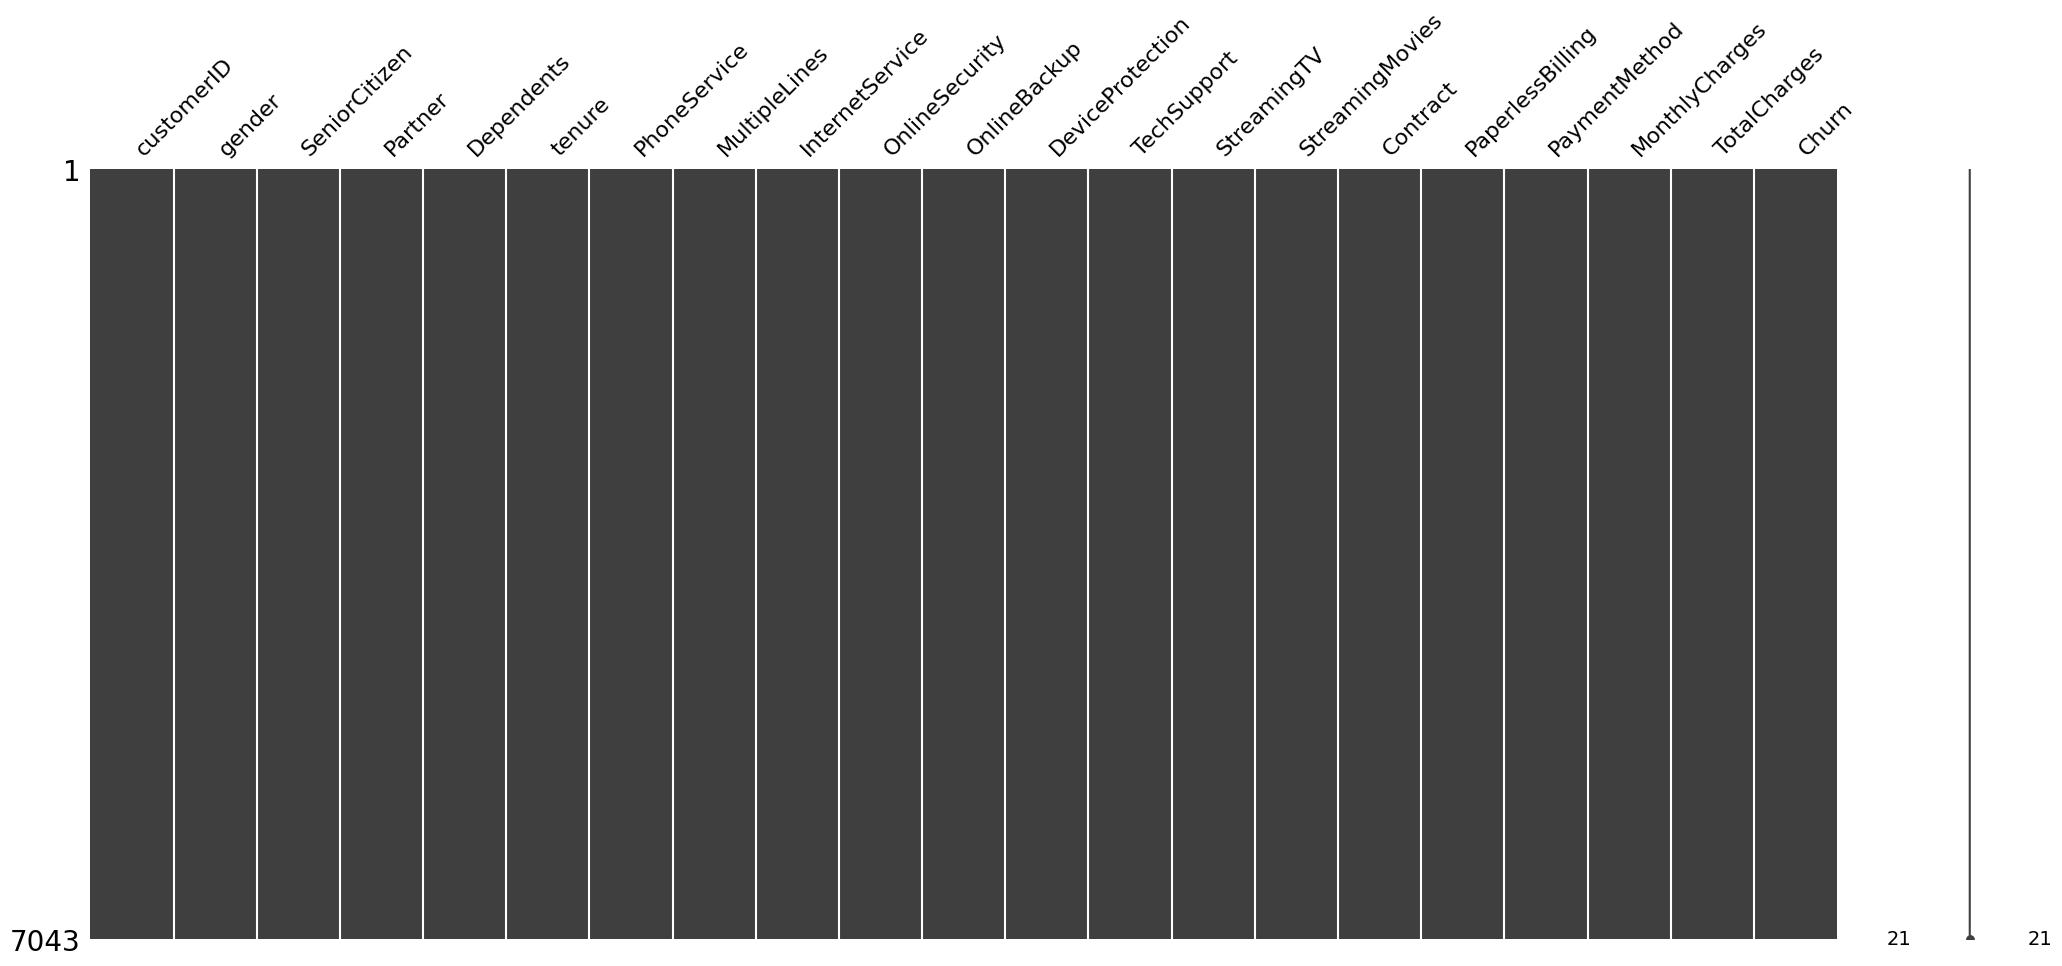

In [27]:
msno.matrix(df);

In [28]:
df = df.drop(['customerID'], axis = 1)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [29]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [30]:
df[np.isnan(df['TotalCharges'])]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           

In [31]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [32]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [33]:
df.fillna(df["TotalCharges"].mean())

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7032 rows x 20 columns]

In [34]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [35]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [36]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [37]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

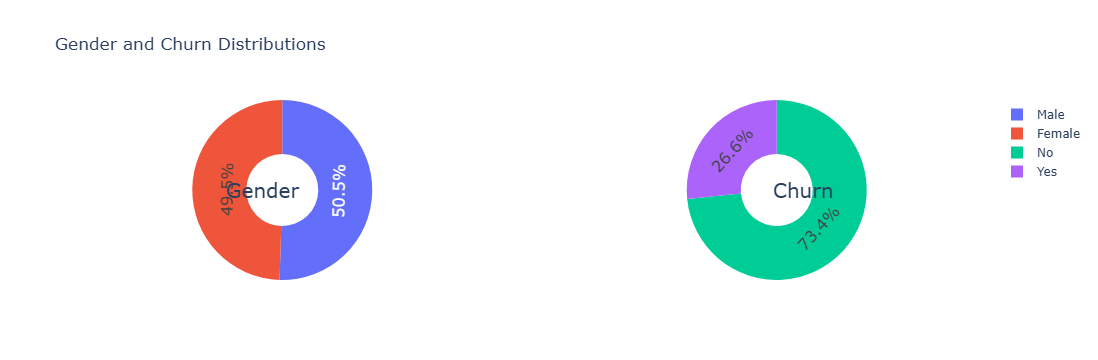

In [38]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [39]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [40]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

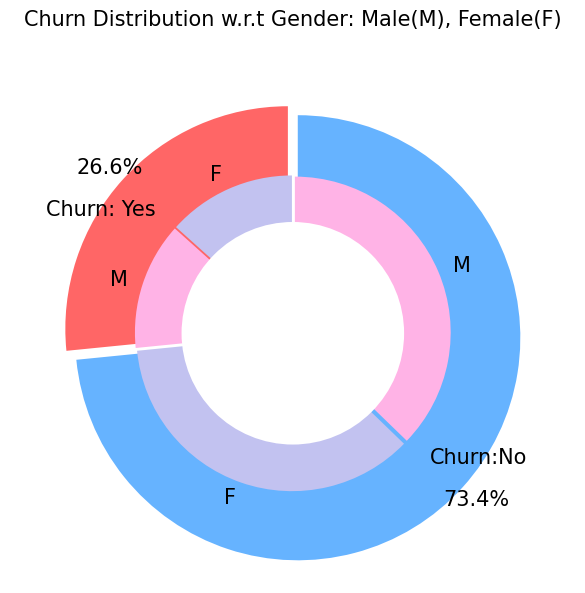

In [41]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [42]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

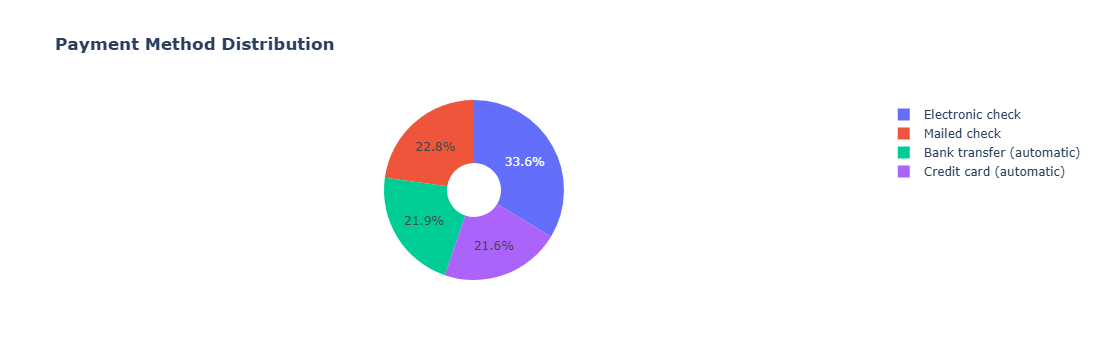

In [43]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

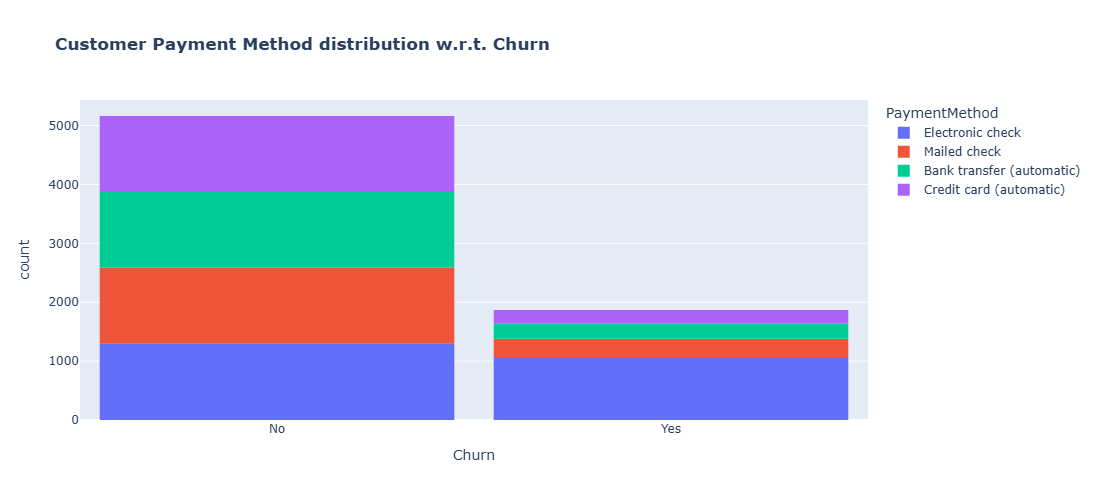

In [44]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [45]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [46]:
df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [47]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

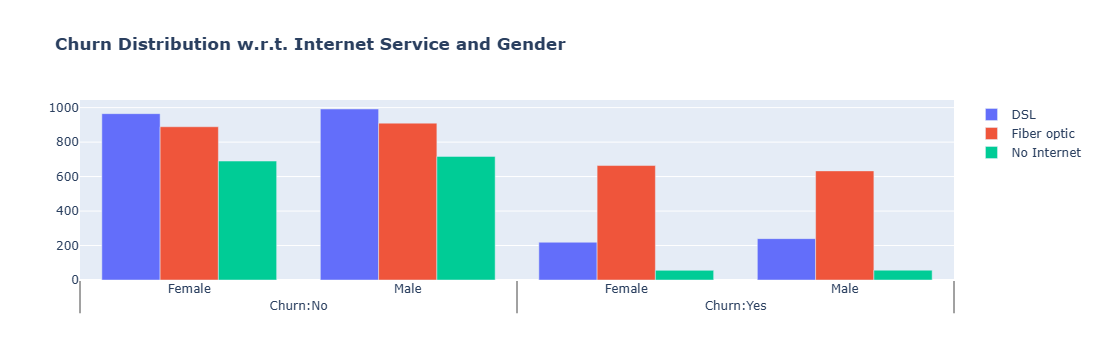

In [48]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

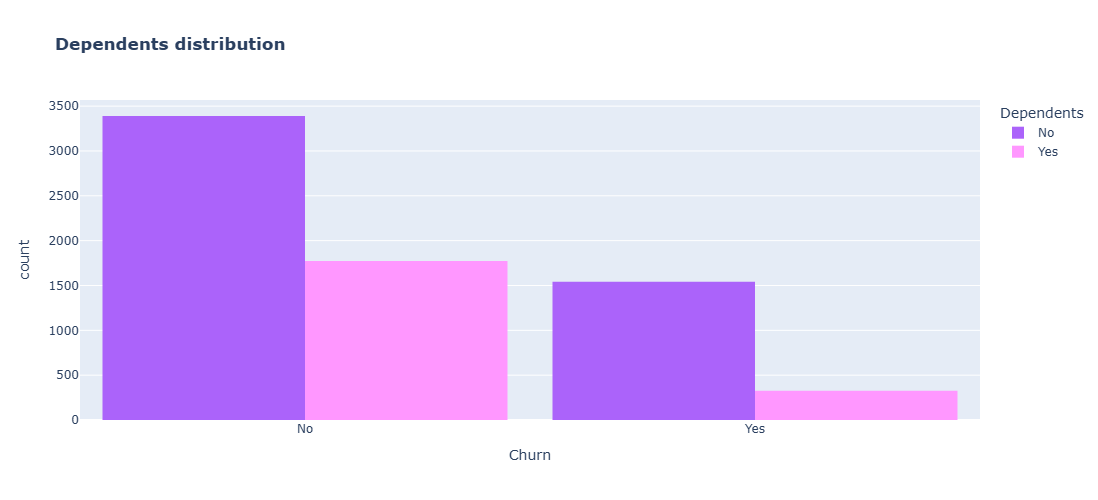

In [49]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

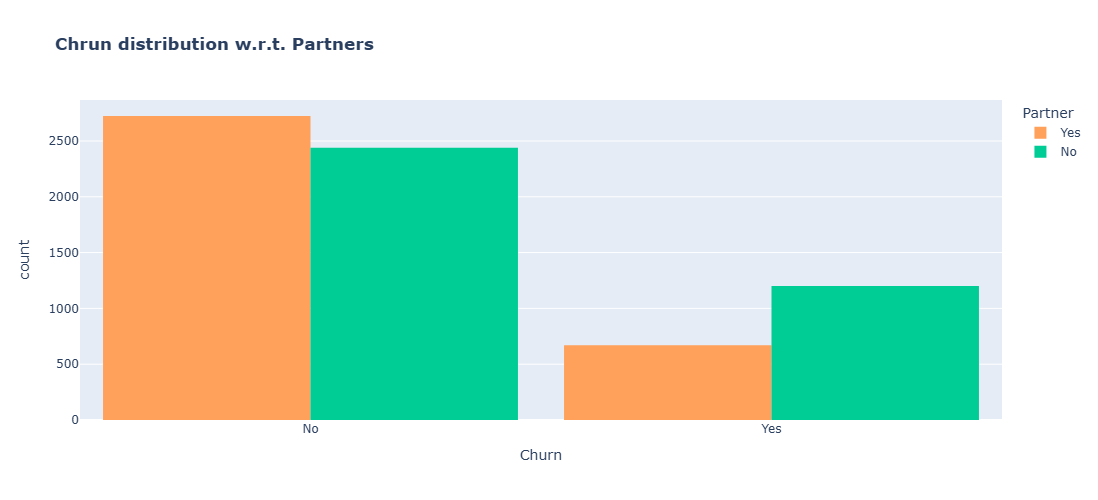

In [50]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

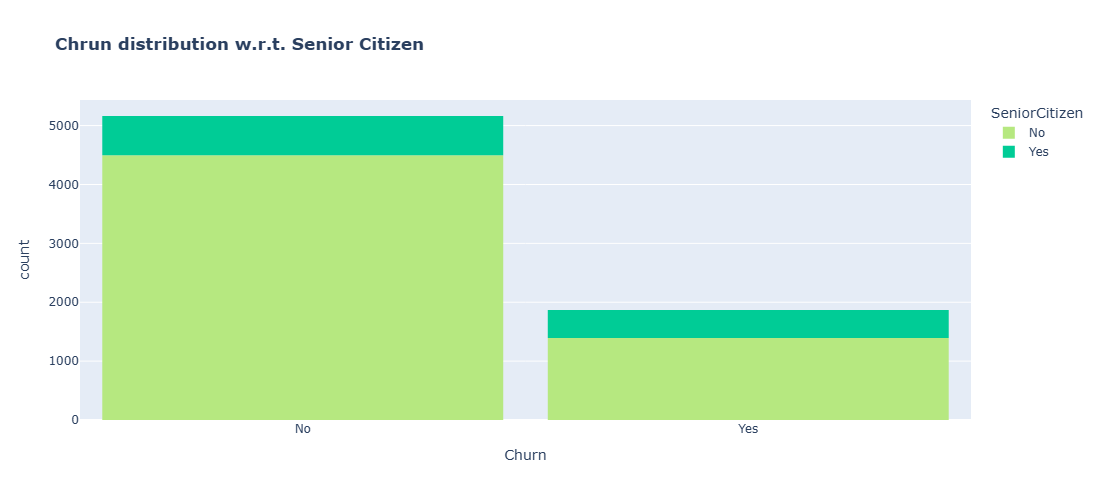

In [51]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

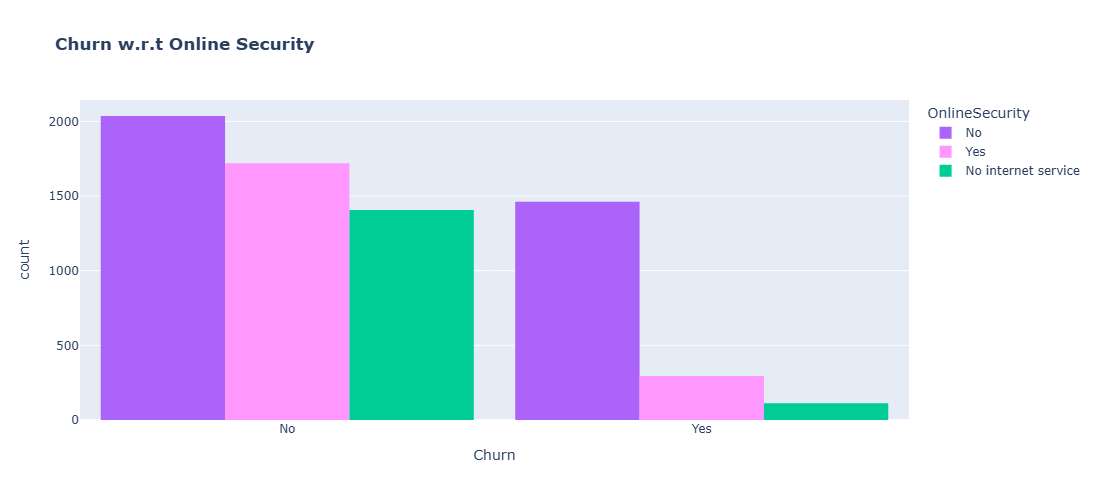

In [52]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

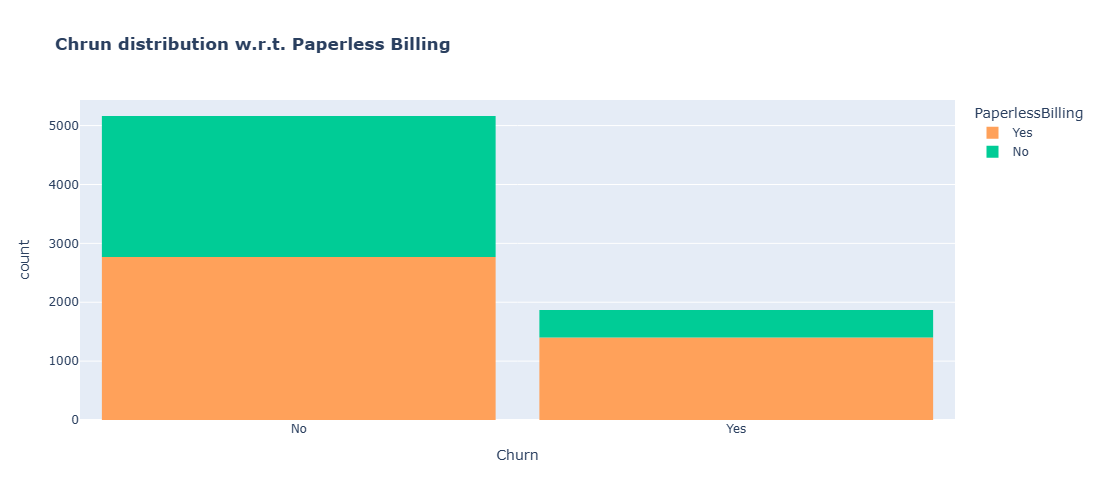

In [53]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

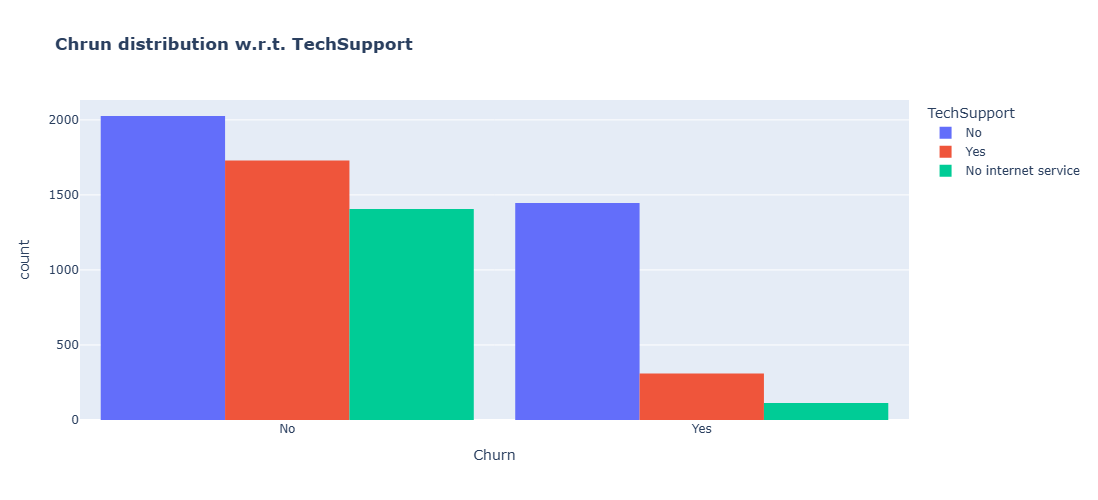

In [54]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

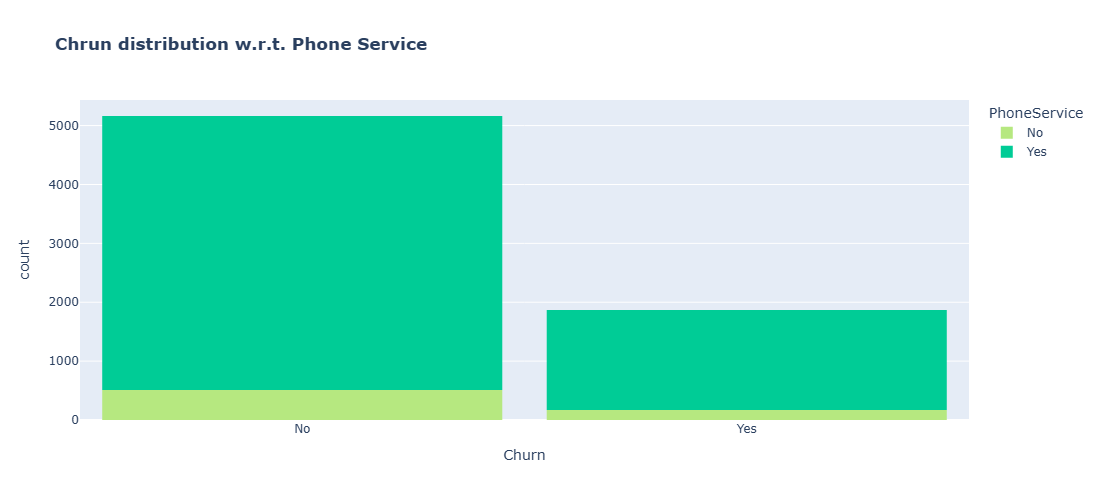

In [55]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

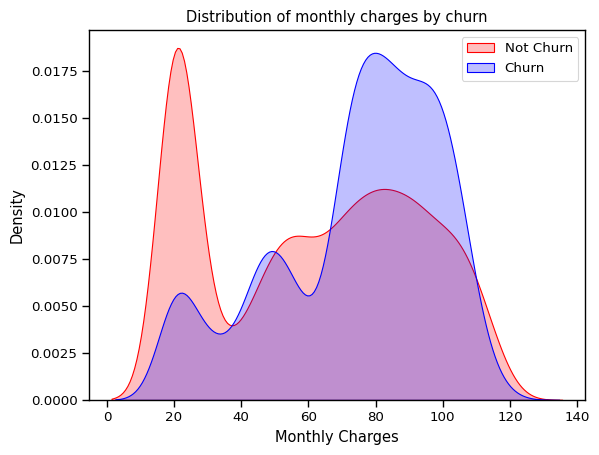

In [56]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');


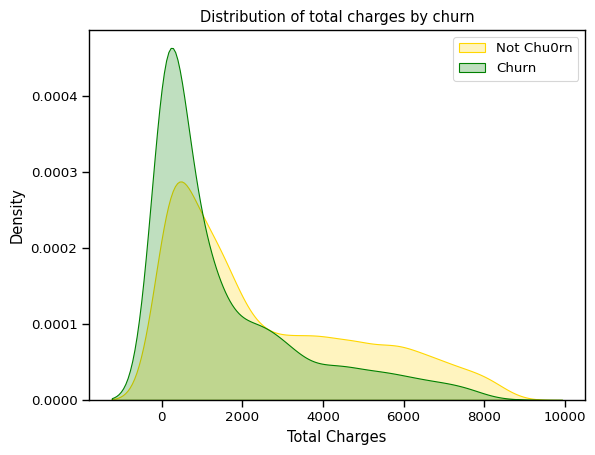

In [57]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

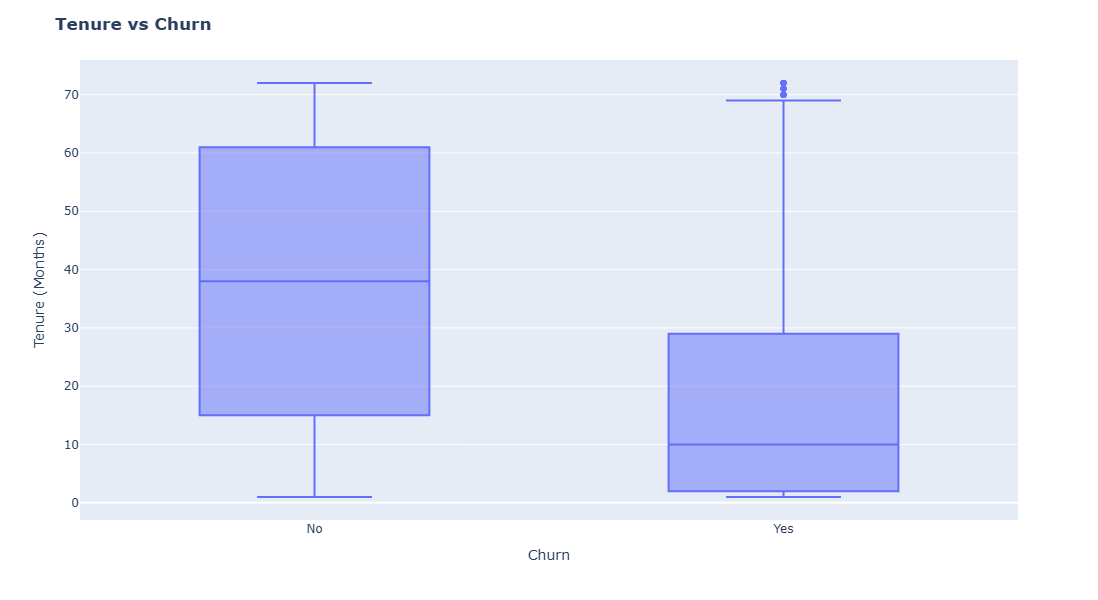

In [58]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

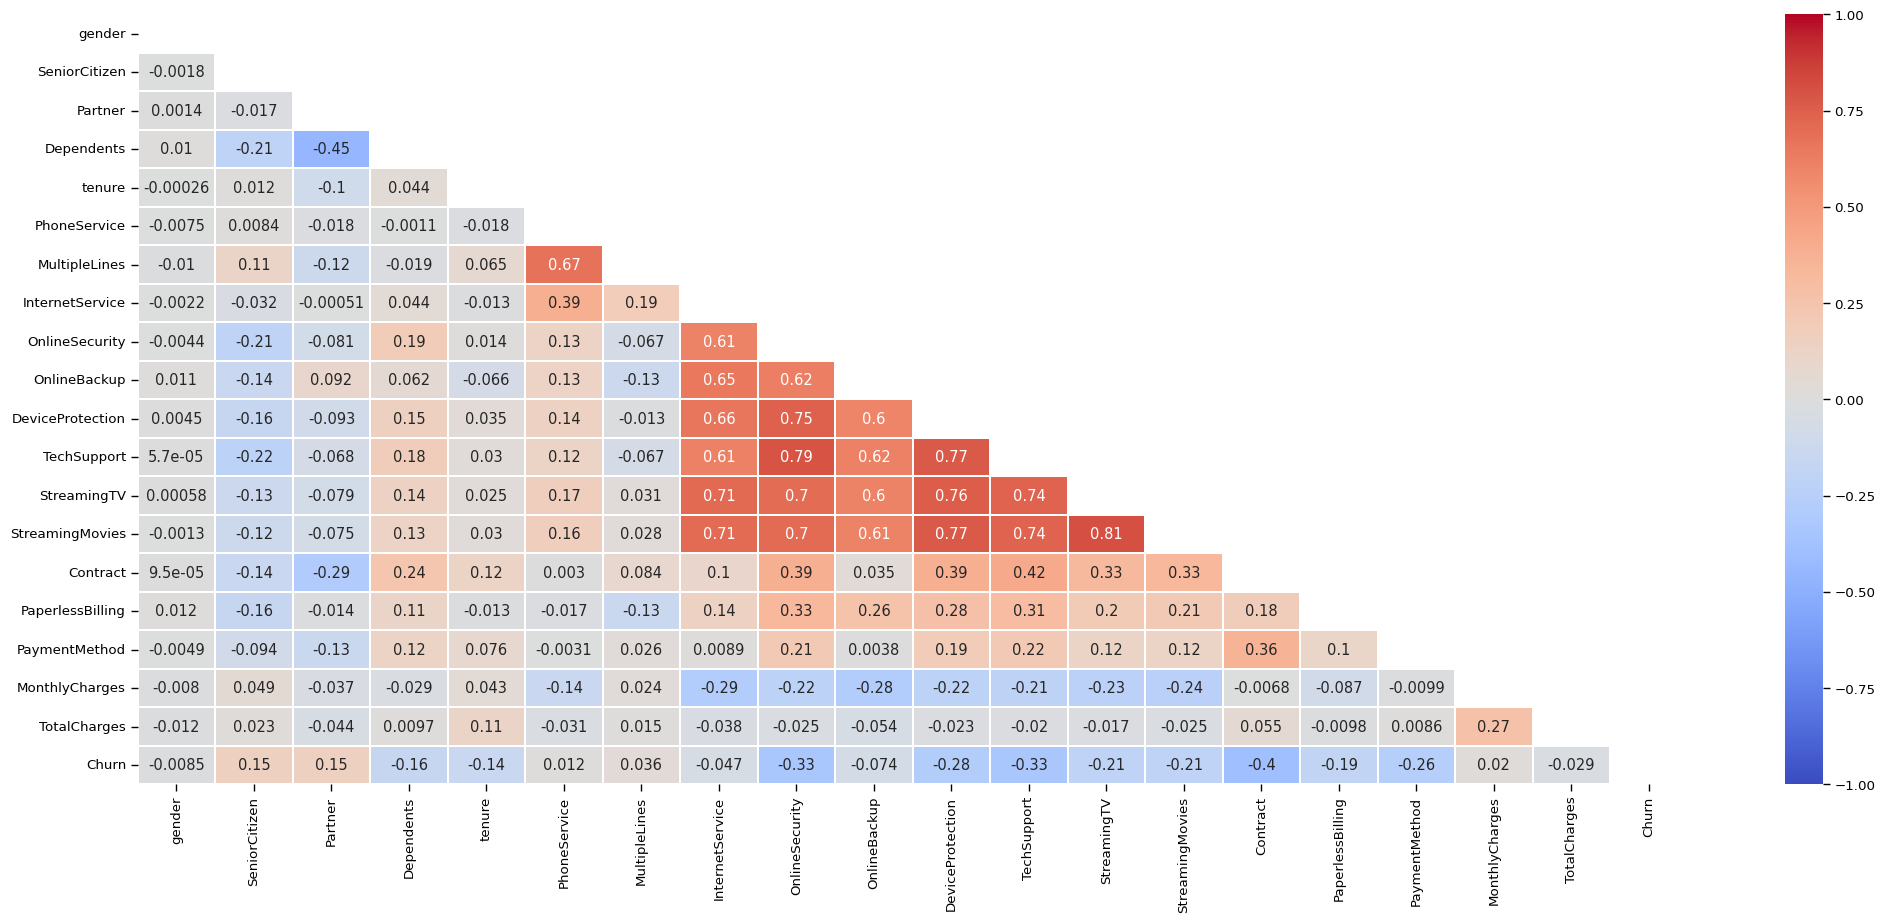

In [59]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [60]:
#DATA PREPROCESSING 
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [61]:
df = df.apply(lambda x: object_to_int(x))
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [62]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [63]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [65]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

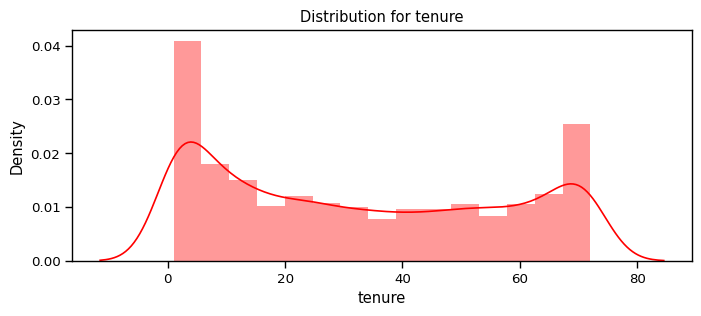

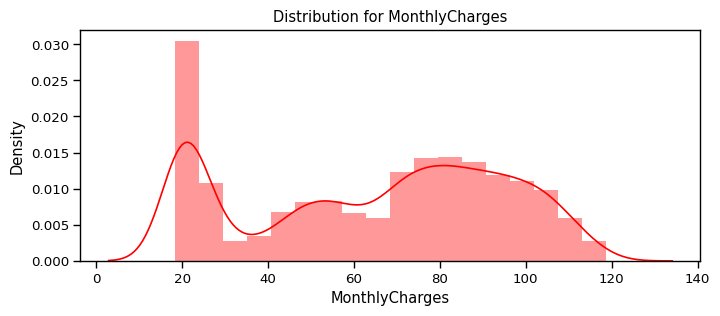

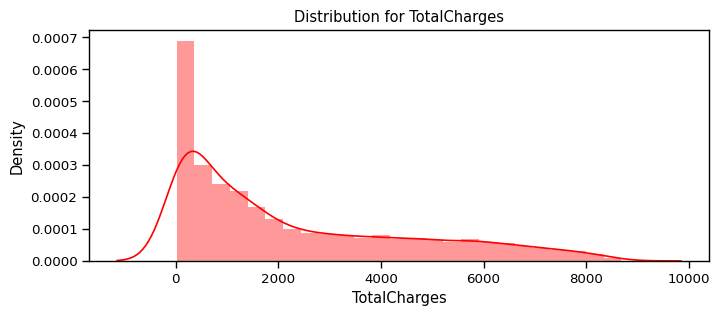

In [66]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

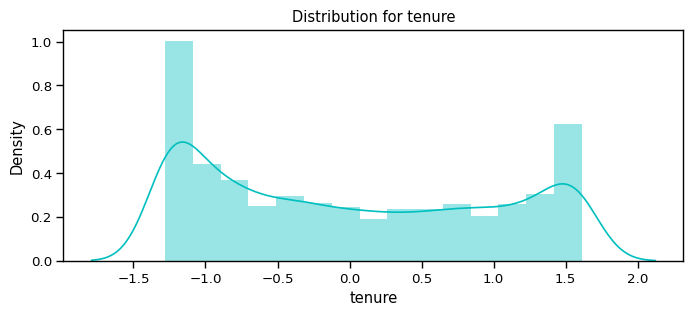

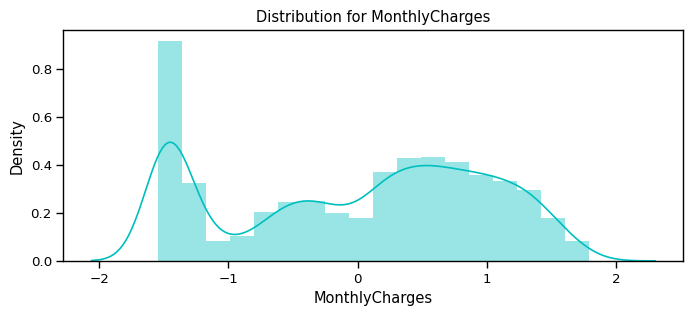

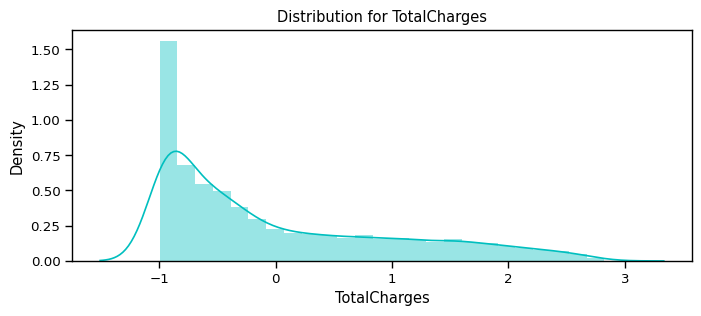

In [67]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [68]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [69]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [70]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import joblib

# 1. Load your dataset
df = pd.read_csv("at.csv")  # make sure this path is correct

# 2. Clean and preprocess
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()  # Drop missing values

# Target variable
target = 'Churn'
df[target] = df[target].apply(lambda x: 1 if x == 'Yes' else 0)

# 3. Define columns
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
cat_cols_ohe = ['PaymentMethod', 'Contract', 'InternetService']
cat_cols_le = list(set(df.columns) - set(num_cols) - set(cat_cols_ohe) - {target})

# 4. Apply encodings
df_ohe = pd.get_dummies(df[cat_cols_ohe], drop_first=True)

le_encoders = {}
for col in cat_cols_le:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_encoders[col] = le  # save encoders if needed later

# 5. Final feature matrix
X = pd.concat([df[num_cols], df[cat_cols_le], df_ohe], axis=1)
y = df[target]

# 6. Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 7. Train KNN
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)

# 8. Evaluate
print("KNN Accuracy:", knn_model.score(X_test, y_test))

# 9. Save everything
joblib.dump(knn_model, 'churn_knn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le_encoders, 'label_encoders.pkl')
joblib.dump(X_train.columns.tolist(), 'feature_order.pkl')  # to align user input later

KNN Accuracy: 0.7221037668798863


['feature_order.pkl']

In [71]:
from sklearn.metrics import classification_report

# Predict using the trained model
predicted_y = knn_model.predict(X_test)

# Now print classification report
print(classification_report(y_test, predicted_y))


              precision    recall  f1-score   support

           0       0.74      0.96      0.83      1033
           1       0.38      0.07      0.13       374

    accuracy                           0.72      1407
   macro avg       0.56      0.52      0.48      1407
weighted avg       0.65      0.72      0.65      1407



In [72]:
from sklearn.svm import SVC

# Using SVC model
svc_model = SVC(random_state=1)
svc_model.fit(X_train, y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test, y_test)
print("SVM accuracy is:", accuracy_svc)


SVM accuracy is: 0.7341862117981521


In [73]:
from sklearn.svm import SVC
import joblib

# 1. Train the model
svc_model = SVC(probability=True, random_state=1)  # probability=True enables predict_proba()
svc_model.fit(X_train, y_train)

# 2. Evaluate
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test, y_test)
print("SVM accuracy is:", accuracy_svc)

# 3. Save the trained model
joblib.dump(svc_model, 'churn_svc_model.pkl')

SVM accuracy is: 0.7341862117981521


['churn_svc_model.pkl']

In [74]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407



In [75]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    n_estimators=500, 
    oob_score=True, 
    n_jobs=-1,
    random_state=50, 
    max_features="sqrt",  # ✅ Change "auto" to "sqrt"
    max_leaf_nodes=30
)

# Fit the model
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=50)

In [77]:
#using random forest model
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7896233120113717


In [78]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1033
           1       0.65      0.44      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.77      1407



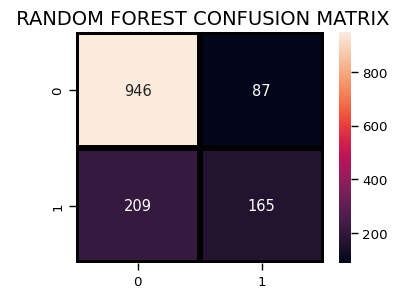

In [79]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

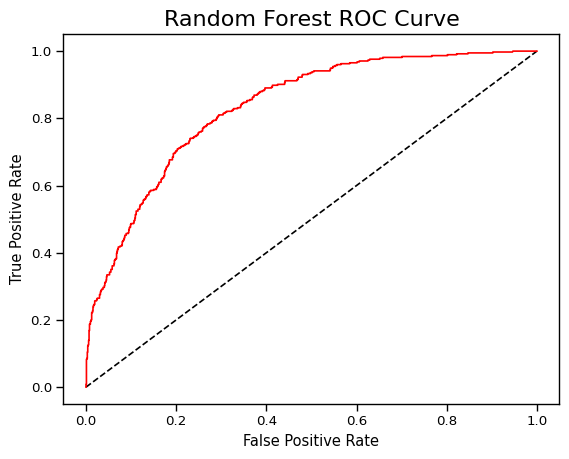

In [80]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [81]:
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn import metrics

# Initialize and fit the model
model_rf = RandomForestClassifier(
    n_estimators=500, 
    oob_score=True, 
    n_jobs=-1,
    random_state=50, 
    max_features="sqrt",
    max_leaf_nodes=30
)
model_rf.fit(X_train, y_train)

# Evaluate
prediction_test = model_rf.predict(X_test)
accuracy_rf = metrics.accuracy_score(y_test, prediction_test)
print("Random Forest Accuracy:", accuracy_rf)

# Save the model
joblib.dump(model_rf, 'churn_rf_model.pkl')
import pickle

# Save the full model (RandomForestClassifier or pipeline)
# Save the trained model properly using pickle
import pickle

with open('churn_rf_model.pkl', 'wb') as f:
    pickle.dump(model_rf, f)  # ✅ use model_rf, not model
import pickle

# Save the model
with open('churn_rf_model.pkl', 'wb') as f:
    pickle.dump(model_rf, f)

# Save the list of features the model was trained on
with open('churn_rf_features.pkl', 'wb') as f:
    pickle.dump(X_train.columns.tolist(), f)

Random Forest Accuracy: 0.7896233120113717


In [82]:
import pickle

with open('churn_rf_model.pkl', 'rb') as f:
    loaded_obj = pickle.load(f)

print(type(loaded_obj))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [92]:
import pickle
import pandas as pd

# Load your saved model
with open('churn_rf_model.pkl', 'rb') as f:
    model = pickle.load(f)

# --- 1. Get user input ---
tenure = int(input("Enter Tenure (months): "))
monthly_charges = float(input("Enter Monthly Charges: "))
total_charges = float(input("Enter Total Charges: "))

payment_method = input("Enter Payment Method (e.g. Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)): ").strip()
contract = input("Enter Contract Type (Month-to-month, One year, Two year): ").strip()
internet_service = input("Enter Internet Service (DSL, Fiber optic, No): ").strip()

# --- 2. Create base input dict ---
input_dict = {
    'tenure': tenure,
    'MonthlyCharges': monthly_charges,
    'TotalCharges': total_charges,
    'PaymentMethod': payment_method,
    'Contract': contract,
    'InternetService': internet_service
}

# --- 3. Convert to DataFrame ---
input_df = pd.DataFrame([input_dict])

# --- 4. One-Hot Encoding (align with model's training features) ---
all_possible_categories = {
    'PaymentMethod': ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'],
    'Contract': ['Month-to-month', 'One year', 'Two year'],
    'InternetService': ['DSL', 'Fiber optic', 'No']
}

dummy_data = pd.DataFrame([{**{k: v[0] for k, v in all_possible_categories.items()},
                            **{'tenure': 0, 'MonthlyCharges': 0.0, 'TotalCharges': 0.0}}])

combined_df = pd.concat([dummy_data, input_df], ignore_index=True)
encoded_df = pd.get_dummies(combined_df, columns=['PaymentMethod', 'Contract', 'InternetService'])

# Drop the dummy row
encoded_input = encoded_df.iloc[1:]

# Load expected feature list from training
with open('churn_rf_features.pkl', 'rb') as f:
    model_features = pickle.load(f)

# Align columns
encoded_input = encoded_input.reindex(columns=model_features, fill_value=0)

# --- 5. Predict churn probability ---
prob = model.predict_proba(encoded_input)[0][1]

# --- 6. Show result based on threshold ---

if prob < 0.50:
    print(f"\n⚠️ This customer is LIKELY to churn. (Confidence: {prob:.2%})")
else:
    print(f"\n✅ This customer is NOT likely to churn. (Confidence: {prob:.2%})")


Enter Tenure (months):  1
Enter Monthly Charges:  108
Enter Total Charges:  108
Enter Payment Method (e.g. Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)):  Electronic Mail
Enter Contract Type (Month-to-month, One year, Two year):  Month-to-month
Enter Internet Service (DSL, Fiber optic, No):  Fiber optic



⚠️ This customer is LIKELY to churn. (Confidence: 30.14%)


In [93]:
#using logistic regression model 
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7867803837953091


In [94]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



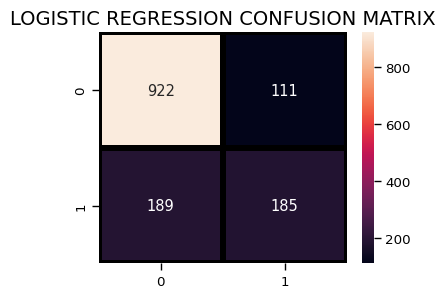

In [95]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

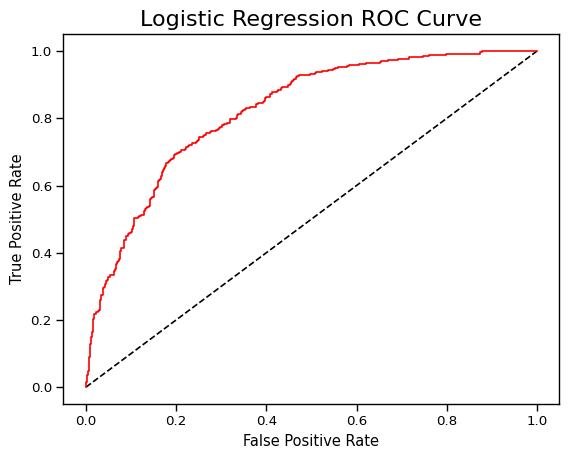

In [96]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

In [97]:
#using desicion tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7420042643923241


In [98]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1033
           1       0.51      0.52      0.52       374

    accuracy                           0.74      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.74      0.74      0.74      1407



In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [100]:
# Generate confusion matrix
cm = confusion_matrix(y_test, predictdt_y)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, predictdt_y))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1033
           1       0.51      0.52      0.52       374

    accuracy                           0.74      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.74      0.74      0.74      1407



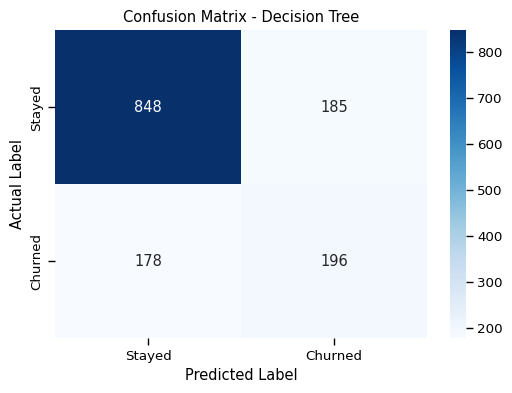

In [101]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Churned"], yticklabels=["Stayed", "Churned"])

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Decision Tree")

# Show plot
plt.show()

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1033
           1       0.51      0.52      0.52       374

    accuracy                           0.74      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.74      0.74      0.74      1407



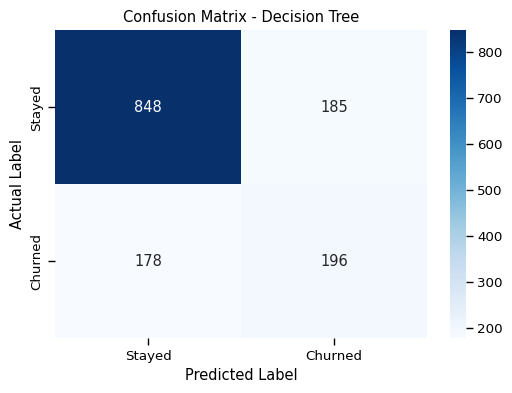

In [103]:
# Generate confusion matrix
cm = confusion_matrix(y_test, predictdt_y)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, predictdt_y))

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Churned"], yticklabels=["Stayed", "Churned"])

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Decision Tree")

# Show plot
plt.show()

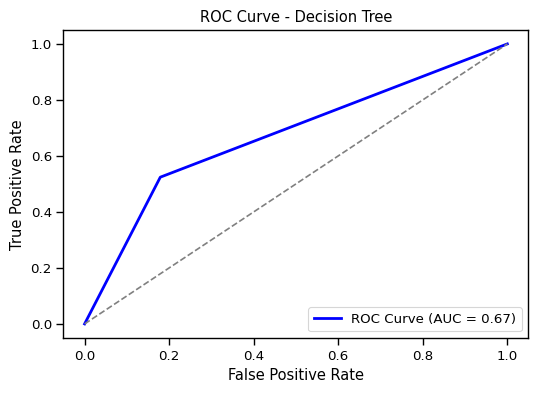

In [104]:
# Get predicted probabilities (for positive class)
y_probs = dt_model.predict_proba(X_test)[:, 1]  # Probability for class 1 (Churn)

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_probs)  # False Positive Rate, True Positive Rate
roc_auc = auc(fpr, tpr)  # Area Under Curve (AUC)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line

# Labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")

# Show plot
plt.show()

In [105]:
#SEGMENTATION
import pandas as pd

# Load dataset
file_path = "at.csv"
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

# Display dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [106]:
import pandas as pd
import numpy as np

# Load dataset
file_path = "at.csv"
df = pd.read_csv(file_path)

# Convert 'TotalCharges' to numeric (some values might be empty)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# Select numerical features
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df_selected = df[numerical_features]

# Handle missing values
df_selected = df_selected.dropna()

# Display summary statistics
print(df_selected.describe())

            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000


In [107]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

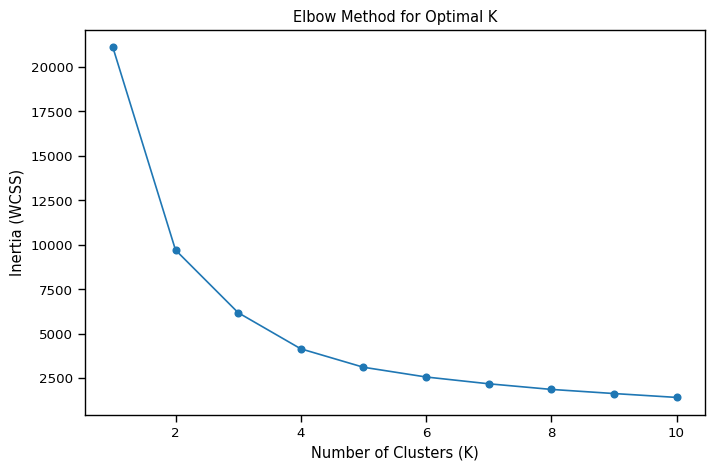

In [108]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine optimal K using Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [109]:
# Apply K-Means with chosen K
optimal_k = 4  # Change based on Elbow Method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_selected["Cluster"] = kmeans.fit_predict(df_scaled)

# Display cluster assignments
print(df_selected["Cluster"].value_counts())

Cluster
3    2273
1    1904
0    1696
2    1159
Name: count, dtype: int64


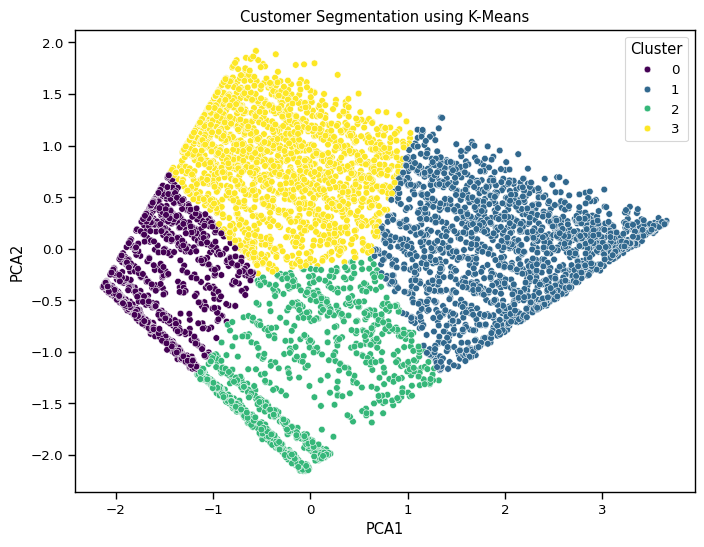

In [110]:
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

# Reduce dimensions using PCA (2D)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_selected["PCA1"] = df_pca[:, 0]
df_selected["PCA2"] = df_pca[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", palette="viridis", data=df_selected)
plt.title("Customer Segmentation using K-Means")
plt.show()

In [111]:
#DBSCAN finds arbitrary-shaped clusters and outliers.
from sklearn.preprocessing import StandardScaler

# Select features to cluster on
features = ["tenure", "MonthlyCharges"]
df_selected = df[features].copy()  # use your actual DataFrame name

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)
from sklearn.cluster import DBSCAN
import pickle

# Apply DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
df_selected["DBSCAN_Cluster"] = dbscan.fit_predict(df_scaled)

# Count clusters
print(df_selected["DBSCAN_Cluster"].value_counts())

# --- STEP 1: Label Clusters ---
# Analyze the average behavior in each cluster
cluster_summary = df_selected.groupby("DBSCAN_Cluster").agg({
    "tenure": "mean",
    "MonthlyCharges": "mean"
}).round(2)

print("\n📊 Cluster Summary:")
print(cluster_summary)

# Define labels manually based on analysis above
cluster_labels = {
    0: "New Low-Spend Customer",
    1: "Loyal High-Spend Customer",
    2: "Discount Seeker",
    -1: "Outlier"
}

# Save cluster labels to JSON
import json
with open("dbscan_cluster_labels.json", "w") as f:
    json.dump(cluster_labels, f)

# --- Save the model and the scaler ---
with open("dbscan_model.pkl", "wb") as f:
    pickle.dump(dbscan, f)

with open("dbscan_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)  # assuming you used a StandardScaler or similar
    # --- Save the scaled training data and labels for later prediction ---
np.save("dbscan_scaled_data.npy", df_scaled)
np.save("dbscan_labels.npy", df_selected["DBSCAN_Cluster"].values)

print("✅ DBSCAN model and scaler saved successfully.")

DBSCAN_Cluster
0    7043
Name: count, dtype: int64

📊 Cluster Summary:
                tenure  MonthlyCharges
DBSCAN_Cluster                        
0                32.37           64.76
✅ DBSCAN model and scaler saved successfully.


In [114]:
# TO CHECK CUSTOMER Segmentation1
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import json
from sklearn.metrics import pairwise_distances_argmin

# --- 1. Load saved model, scaler, and cluster data ---
with open("dbscan_model.pkl", "rb") as f:
    dbscan_model = pickle.load(f)

with open("dbscan_scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

df_scaled_loaded = np.load("dbscan_scaled_data.npy")
dbscan_labels = np.load("dbscan_labels.npy")

# Load cluster name map
with open("dbscan_cluster_labels.json", "r") as f:
    cluster_labels_map = json.load(f)

# --- 2. Take user input ---
tenure = float(input("Enter Tenure (months): "))
monthly_charges = float(input("Enter Monthly Charges: "))

# --- 3. Create DataFrame and scale it ---
input_data = pd.DataFrame([[tenure, monthly_charges]], columns=["tenure", "MonthlyCharges"])
input_scaled = scaler.transform(input_data)

# --- 4. Find nearest point in training data ---
nearest_idx = pairwise_distances_argmin(input_scaled, df_scaled_loaded)[0]
predicted_cluster = int(dbscan_labels[nearest_idx])  # make sure it's int

# --- 5. Get friendly label ---
cluster_name = cluster_labels_map.get(str(predicted_cluster), "Unknown Cluster")

# --- 6. Display result ---
if predicted_cluster == -1:
    print(f"\n⚠️ This customer is considered an OUTLIER (not part of any cluster).")
else:
    print(f"\n✅ This customer belongs to Cluster {predicted_cluster}: {cluster_name}")

Enter Tenure (months):  1
Enter Monthly Charges:  20



✅ This customer belongs to Cluster 0: New Low-Spend Customer


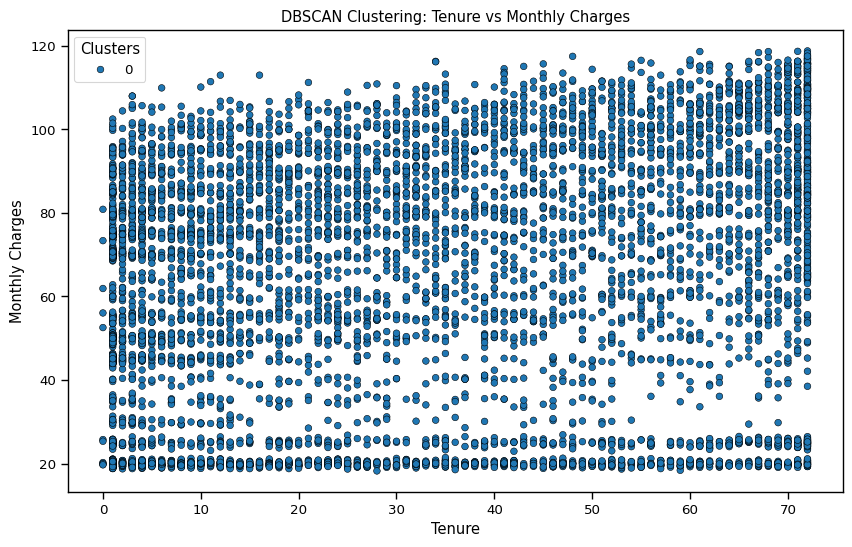

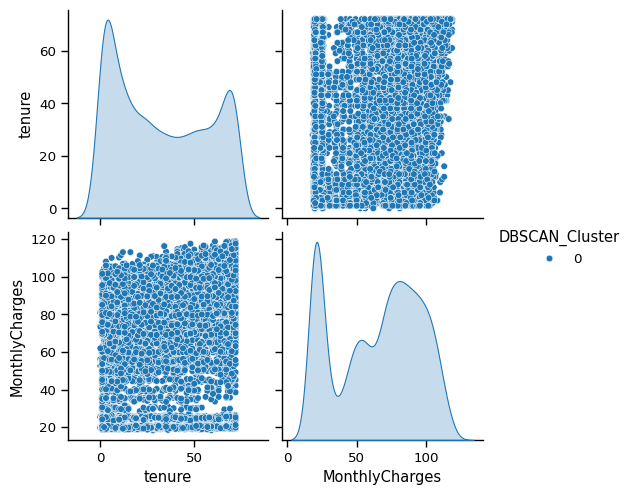

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define colors for different clusters
unique_clusters = np.unique(df_selected["DBSCAN_Cluster"])
palette = sns.color_palette("tab10", len(unique_clusters))

# Scatter plot (Tenure vs MonthlyCharges)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_selected["tenure"], 
    y=df_selected["MonthlyCharges"], 
    hue=df_selected["DBSCAN_Cluster"], 
    palette=palette,
    edgecolor="black"
)
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.title("DBSCAN Clustering: Tenure vs Monthly Charges")
plt.legend(title="Clusters")
plt.show()

# Pairplot (Visualizing clustering in multiple dimensions)
sns.pairplot(df_selected, hue="DBSCAN_Cluster", palette="tab10", diag_kind="kde")
plt.show()

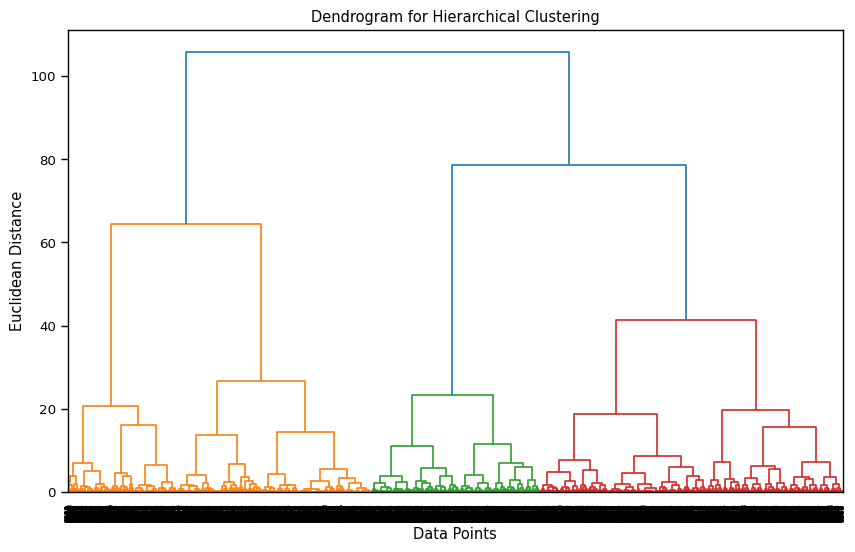

HC_Cluster
0    2747
1    1765
2    1531
3    1000
Name: count, dtype: int64


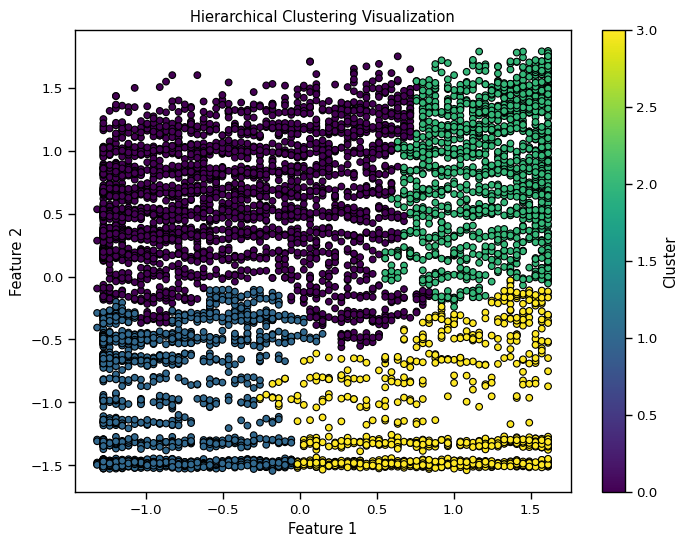

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Enable inline plotting for Jupyter Notebook
%matplotlib inline  

# Sample Data (Replace with actual dataset)
# df_selected = pd.read_csv("your_data.csv")

# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)  # Use relevant features

# Plot Dendrogram
plt.figure(figsize=(10, 6))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
sch.dendrogram(sch.linkage(df_scaled, method="ward"))
plt.show()  # Ensure the plot appears

# Apply Hierarchical Clustering (Fix: Use `metric="euclidean"`)
n_clusters = 4  # Adjust based on dendrogram insights
hc = AgglomerativeClustering(n_clusters=n_clusters, metric="euclidean", linkage="ward")
df_selected["HC_Cluster"] = hc.fit_predict(df_scaled)

# Count clusters
print(df_selected["HC_Cluster"].value_counts())

# Visualization of Clusters (for 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df_selected["HC_Cluster"], cmap="viridis", edgecolors="k")
plt.title("Hierarchical Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()  # Ensure the plot appears

In [117]:
#1 Load & preprocess dataset
#2️ Select relevant features
#3️ Standardize data
#4️ Find optimal K (Elbow Method)
#5️ Apply K-Means clustering
#6️ Visualize clusters with PCA
#7️ Try DBSCAN & Hierarchical clustering

In [118]:
# AI BASED PRICE OPTIMIZATION TO RETAIN CUSTOMERS

In [119]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("at.csv")

# Convert 'TotalCharges' to numeric (since it might have been read as an object)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing values only for numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Verify missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [120]:
from sklearn.linear_model import LinearRegression  # ✅ This was missing
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pickle

# --- Train Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# --- Train Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# --- Train XGBoost Regressor ---
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

import pickle

# Save Linear Regression
with open("lr_model.pkl", "wb") as f:
    pickle.dump(lr_model, f)

# Save Random Forest
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Save XGBoost
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

print("✅ All models saved successfully!")

✅ All models saved successfully!


In [121]:
import pickle

# Load trained models
with open("lr_model.pkl", "rb") as f:
    lr_model = pickle.load(f)

with open("rf_model.pkl", "rb") as f:
    rf_model = pickle.load(f)

with open("xgb_model.pkl", "rb") as f:
    xgb_model = pickle.load(f)

print("✅ Models loaded successfully!")

✅ Models loaded successfully!


In [122]:
import joblib

# Save the trained model
joblib.dump(knn_model, 'churn_knn_model.pkl')

# Save the fitted scaler
joblib.dump(scaler, 'scaler.pkl')

# Save label encoders
joblib.dump(le_encoders, 'label_encoders.pkl')

# Save feature order to align user input later
joblib.dump(X_train.columns.tolist(), 'feature_order.pkl')


['feature_order.pkl']

In [133]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to evaluate models
def evaluate_model(true, pred, model_name):
    print(f"{model_name} - MAE: {mean_absolute_error(true, pred):.2f}, RMSE: {np.sqrt(mean_squared_error(true, pred)):.2f}")

evaluate_model(y_test, lr_pred, "Linear Regression")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, xgb_pred, "XGBoost")

Linear Regression - MAE: 0.30, RMSE: 0.38
Random Forest - MAE: 0.28, RMSE: 0.38
XGBoost - MAE: 0.28, RMSE: 0.38


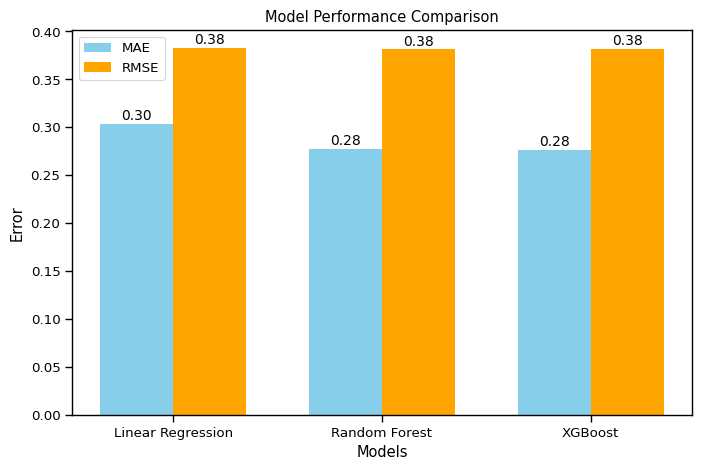

In [134]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and error metrics
models = ["Linear Regression", "Random Forest", "XGBoost"]
mae_scores = [
    mean_absolute_error(y_test, lr_pred),
    mean_absolute_error(y_test, rf_pred),
    mean_absolute_error(y_test, xgb_pred)
]
rmse_scores = [
    np.sqrt(mean_squared_error(y_test, lr_pred)),
    np.sqrt(mean_squared_error(y_test, rf_pred)),
    np.sqrt(mean_squared_error(y_test, xgb_pred))
]

# Bar plot
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, mae_scores, width, label="MAE", color="skyblue")
bars2 = ax.bar(x + width/2, rmse_scores, width, label="RMSE", color="orange")

ax.set_xlabel("Models")
ax.set_ylabel("Error")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display values on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha="center", fontsize=10)

plt.show()

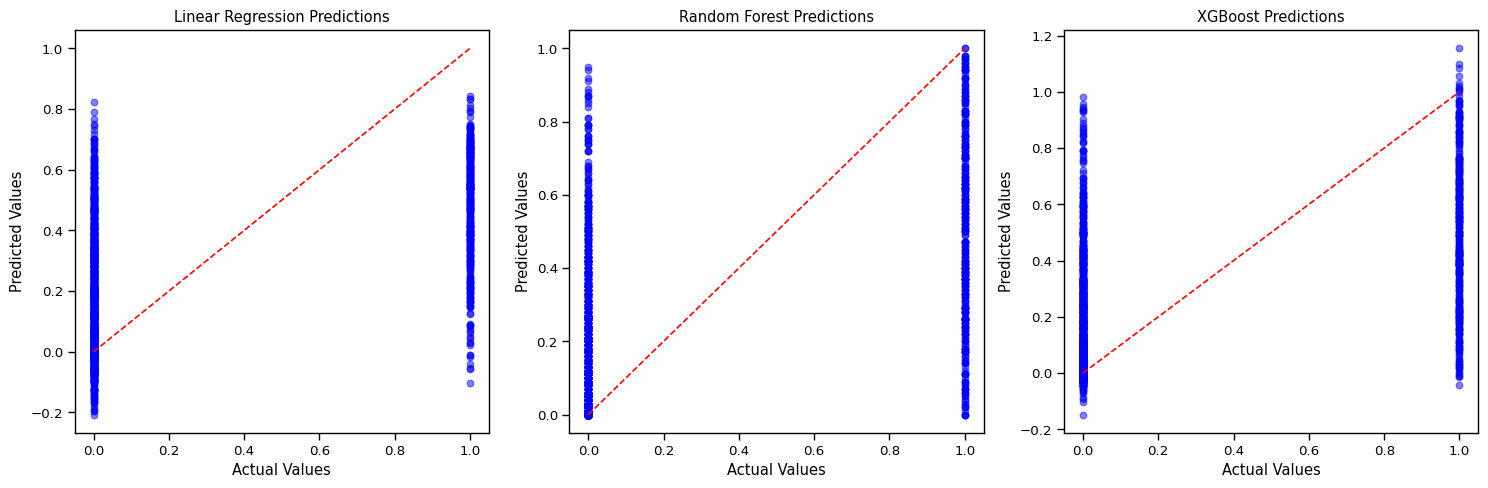

In [135]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for each model
for i, (pred, model) in enumerate(zip([lr_pred, rf_pred, xgb_pred], models)):
    axes[i].scatter(y_test, pred, alpha=0.5, color="blue")
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="red")
    axes[i].set_xlabel("Actual Values")
    axes[i].set_ylabel("Predicted Values")
    axes[i].set_title(f"{model} Predictions")

plt.tight_layout()
plt.show()

In [137]:
!pip install gym


     ---------------------------------------- 0.0/721.7 kB ? eta -:--:--
      --------------------------------------- 10.2/721.7 kB ? eta -:--:--
     - ----------------------------------- 30.7/721.7 kB 330.3 kB/s eta 0:00:03
     ---- -------------------------------- 81.9/721.7 kB 573.4 kB/s eta 0:00:02
     ------------ ------------------------- 245.8/721.7 kB 1.4 MB/s eta 0:00:01
     ---------------------------- --------- 532.5/721.7 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 721.7/721.7 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for gym_notices>=0.0.4 from https://files.pythonhosted.org/packages/25/26/d786c6bec30fe6

In [138]:
import gym
import numpy as np
import pandas as pd
from gym import spaces


In [139]:
class PricingEnv(gym.Env):
    def __init__(self, df):
        super(PricingEnv, self).__init__()
        
        # Load dataset
        self.df = df.reset_index(drop=True)
        self.n_customers = len(df)
        self.current_index = 0  # Track customer index
        
        # Define action space (Discrete: Increase, Decrease, Keep price)
        self.action_space = spaces.Discrete(3)  

        # Define observation space (Normalized customer data)
        self.observation_space = spaces.Box(low=0, high=1, shape=(3,), dtype=np.float32)

    def reset(self):
        """Reset environment for new episode"""
        self.current_index = 0
        return self._get_observation()
    
    def _get_observation(self):
        """Get customer features as state"""
        customer = self.df.iloc[self.current_index]
        return np.array([
            customer["tenure"] / 72,  # Normalize tenure (0-72 months)
            customer["MonthlyCharges"] / 100,  # Normalize charges
            customer["TotalCharges"] / 5000  # Normalize total charges
        ], dtype=np.float32)
    
    def step(self, action):
        """Apply action & return next state, reward, done flag"""
        customer = self.df.iloc[self.current_index]
        old_price = customer["MonthlyCharges"]
        
        # Apply action: 0 = Decrease Price, 1 = Keep Same, 2 = Increase Price
        if action == 0:
            new_price = old_price * 0.9  # 10% discount
        elif action == 2:
            new_price = old_price * 1.1  # 10% increase
        else:
            new_price = old_price  # No change

        # Compute reward: Retaining customers while maximizing revenue
        churn_penalty = -1 if customer["Churn"] == "Yes" else 1
        revenue = new_price if customer["Churn"] == "No" else 0
        reward = revenue * churn_penalty  

        # Move to next customer
        self.current_index += 1
        done = self.current_index >= self.n_customers  # End episode when all customers are processed
        
        return self._get_observation(), reward, done, {}

    def render(self, mode="human"):
        pass  # Optional for visualization

In [140]:
class PricingEnv(gym.Env):
    def __init__(self, df):
        super(PricingEnv, self).__init__()
        
        # Load dataset
        self.df = df.reset_index(drop=True)
        self.n_customers = len(df)
        self.current_index = 0  # Track customer index
        
        # Define action space (Discrete: Increase, Decrease, Keep price)
        self.action_space = spaces.Discrete(3)  

        # Define observation space (Normalized customer data)
        self.observation_space = spaces.Box(low=0, high=1, shape=(3,), dtype=np.float32)

    def reset(self):
        """Reset environment for new episode"""
        self.current_index = 0
        return self._get_observation()
    
    def _get_observation(self):
        """Get customer features as state"""
        customer = self.df.iloc[self.current_index]
        return np.array([
            customer["tenure"] / 72,  # Normalize tenure (0-72 months)
            customer["MonthlyCharges"] / 100,  # Normalize charges
            customer["TotalCharges"] / 5000  # Normalize total charges
        ], dtype=np.float32)
    
    def step(self, action):
        """Apply action & return next state, reward, done flag"""
        customer = self.df.iloc[self.current_index]
        old_price = customer["MonthlyCharges"]
        
        # Apply action: 0 = Decrease Price, 1 = Keep Same, 2 = Increase Price
        if action == 0:
            new_price = old_price * 0.9  # 10% discount
        elif action == 2:
            new_price = old_price * 1.1  # 10% increase
        else:
            new_price = old_price  # No change

        # Compute reward: Retaining customers while maximizing revenue
        churn_penalty = -1 if customer["Churn"] == "Yes" else 1
        revenue = new_price if customer["Churn"] == "No" else 0
        reward = revenue * churn_penalty  

        # Move to next customer
        self.current_index += 1
        done = self.current_index >= self.n_customers  # End episode when all customers are processed
        
        return self._get_observation(), reward, done, {}

    def render(self, mode="human"):
        pass  # Optional for visualization

In [141]:
# Load dataset
df = pd.read_csv("at.csv")

# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Select relevant features for pricing optimization
df = df[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]]

# Normalize total charges
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

In [143]:
!pip install stable-baselines3[extra]


  Obtaining dependency information for stable-baselines3[extra] from https://files.pythonhosted.org/packages/54/60/6900e8186168e6e23a2125655fb4fe53130256480cc7950dadcee030cd67/stable_baselines3-2.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for gymnasium<1.2.0,>=0.29.1 from https://files.pythonhosted.org/packages/f9/68/2bdc7b46b5f543dd865575f9d19716866bdb76e50dd33b71ed1a3dd8bb42/gymnasium-1.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for torch<3.0,>=2.3 from https://files.pythonhosted.org/packages/44/80/b353c024e6b624cd9ce1d66dcb9d24e0294680f95b369f19280e241a0159/torch-2.7.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for pygame from https://files.pythonhosted.org/packages/5f/90/7d766d54bb95939725e9a9361f9c06b0cfbe3fe100aa35400f0a461a278a/pygame-2.6.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for ale-py>=0.9.0 from https://files.pythonhosted.org/packages/8c/82/c443ad9b77519eeb0a833bc96833514d

In [145]:
pip install "shimmy>=2.0"


  Obtaining dependency information for shimmy>=2.0 from https://files.pythonhosted.org/packages/4e/e9/64879ed81025b73865a0b6e5668735bf0b71feff5abb6e7a2bee2a1deae9/Shimmy-2.0.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [146]:
import numpy as np
import pandas as pd
import gym
from gym import spaces
from stable_baselines3 import PPO

class PricingEnv(gym.Env):
    def __init__(self, df):
        super(PricingEnv, self).__init__()
        self.df = df
        self.n_customers = len(df)  # Ensure correct dataset size
        self.current_index = 0  # Start from first customer

        # Define action and observation space
        self.action_space = spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32)
        self.observation_space = spaces.Box(low=0, high=1, shape=(3,), dtype=np.float32)

    def _get_observation(self):
        """Get customer features as state, handle out-of-bounds errors."""
        if self.current_index >= len(self.df):  
            return np.zeros(3, dtype=np.float32)  # Return default observation

        customer = self.df.iloc[self.current_index]
        return np.array([
            customer["tenure"] / 72,  # Normalize tenure (0-72 months)
            customer["MonthlyCharges"] / 100,  # Normalize charges
            customer["TotalCharges"] / 5000  # Normalize total charges
        ], dtype=np.float32)

    def reset(self):
        """Reset environment to start a new episode."""
        self.current_index = 0
        return self._get_observation()

    def step(self, action):
        """Apply action, compute reward, and move to next customer."""
        if self.current_index >= len(self.df):  
            return self._get_observation(), 0, True, {}  # Done if out of bounds

        # Reward logic (modify as needed)
        reward = -abs(action[0] - self.df.iloc[self.current_index]["MonthlyCharges"] / 100)

        self.current_index += 1
        done = self.current_index >= self.n_customers  # End episode if all customers processed
        
        return self._get_observation(), reward, done, {}

# Load your dataset (ensure it has 'tenure', 'MonthlyCharges', 'TotalCharges')
df = pd.DataFrame({
    "tenure": np.random.randint(1, 72, 100),
    "MonthlyCharges": np.random.uniform(20, 100, 100),
    "TotalCharges": np.random.uniform(100, 5000, 100)
})

# ✅ Create the environment
env = PricingEnv(df)

# ✅ Initialize PPO agent
model = PPO("MlpPolicy", env, verbose=1)

# ✅ Train the model
model.learn(total_timesteps=10000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -47.9    |
| time/              |          |
|    fps             | 567      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 100          |
|    ep_rew_mean          | -46.7        |
| time/                   |              |
|    fps                  | 509          |
|    iterations           | 2            |
|    time_elapsed         | 8            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0061206464 |
|    clip_fraction        | 0.0616       |
|    clip_range           | 0.2          |
|    en

In [147]:
obs = env.reset()
for _ in range(10):  # Test on 10 customers
    action, _ = model.predict(obs)
    obs, reward, done, _ = env.step(action)
    print(f"Action: {action}, Reward: {reward}")
    if done:
        obs = env.reset()

Action: [0.], Reward: -0.5289200085921617
Action: [0.13443893], Reward: -0.5123533159750048
Action: [0.], Reward: -0.37024347226236687
Action: [0.75299317], Reward: -0.23691251286928416
Action: [1.], Reward: -0.7677110581574103
Action: [1.], Reward: -0.24446941410089718
Action: [1.], Reward: -0.3986923669953629
Action: [0.40880734], Reward: -0.10004262682480414
Action: [0.38479194], Reward: -0.289036161523768
Action: [0.44532508], Reward: -0.16761018873324757


In [148]:
test_results = []

obs = env.reset()
for _ in range(10):  # Test on 10 customers
    action, _ = model.predict(obs)
    obs, reward, done, _ = env.step(action)
    
    test_results.append((action[0], reward))  # Store action & reward
    print(f"Action: {action[0]}, Reward: {reward}")

    if done:
        obs = env.reset()

# Convert to DataFrame for easy analysis
import pandas as pd
results_df = pd.DataFrame(test_results, columns=["Action", "Reward"])

# Display summary statistics
print("\nTest Results Summary:")
print(results_df.describe())

Action: 1.0, Reward: -0.4710799914078383
Action: 0.0, Reward: -0.6467922479169909
Action: 0.8086947798728943, Reward: -0.4384513076105274
Action: 0.3115330636501312, Reward: -0.6783726156658387
Action: 0.2078332006931305, Reward: -0.02445574114945928
Action: 0.693263053894043, Reward: -0.062267532005059856
Action: 0.7245835065841675, Reward: -0.1232758735795304
Action: 0.6370353102684021, Reward: -0.12818534615950983
Action: 1.0, Reward: -0.3261718980255637
Action: 0.0, Reward: -0.27771488784680004

Test Results Summary:
          Action     Reward
count  10.000000  10.000000
mean    0.538294  -0.317677
std     0.381237   0.236436
min     0.000000  -0.678373
25%     0.233758  -0.462923
50%     0.665149  -0.301943
75%     0.787667  -0.124503
max     1.000000  -0.024456


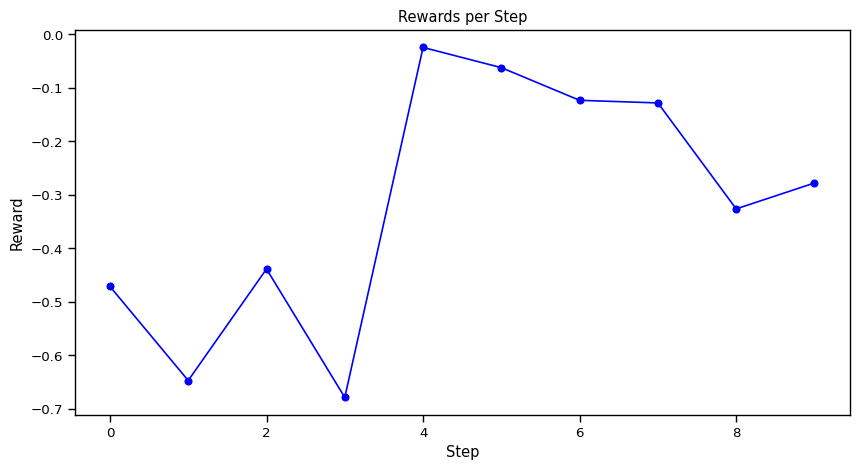

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(results_df["Reward"], marker="o", linestyle="-", color="b")
plt.xlabel("Step")
plt.ylabel("Reward")
plt.title("Rewards per Step")
plt.show()

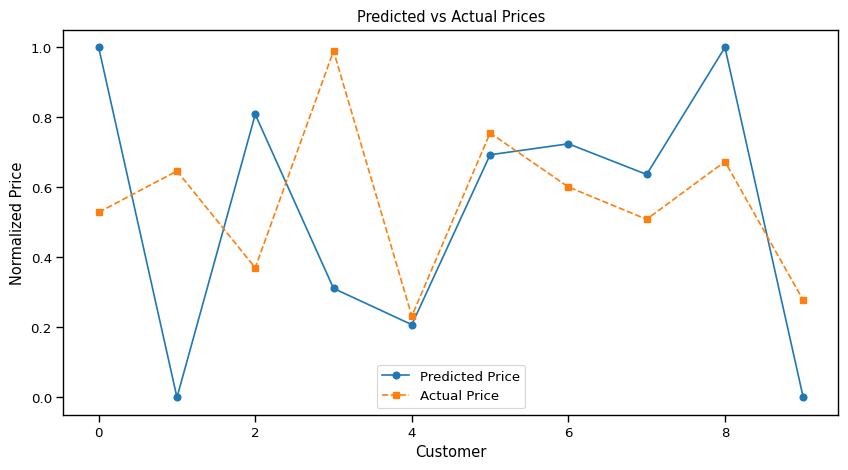

In [150]:
actual_prices = df["MonthlyCharges"].values[:10] / 100  # Normalize actual prices

plt.figure(figsize=(10, 5))
plt.plot(results_df["Action"], marker="o", linestyle="-", label="Predicted Price")
plt.plot(actual_prices, marker="s", linestyle="--", label="Actual Price")
plt.xlabel("Customer")
plt.ylabel("Normalized Price")
plt.legend()
plt.title("Predicted vs Actual Prices")
plt.show()

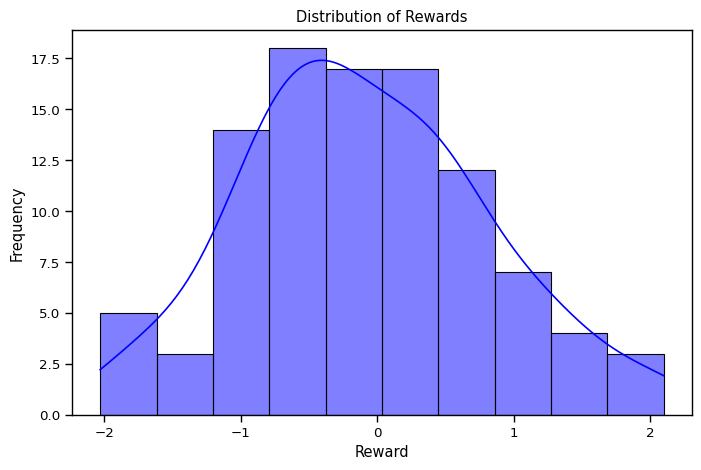

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Create dummy reward data ---
results_df = pd.DataFrame({
    "Reward": np.random.normal(loc=0, scale=1, size=100)  # Simulated rewards
})

# --- Step 2: Plot reward distribution ---
plt.figure(figsize=(8, 5))
sns.histplot(results_df["Reward"], bins=10, kde=True, color="blue")
plt.xlabel("Reward")
plt.ylabel("Frequency")
plt.title("Distribution of Rewards")
plt.show()


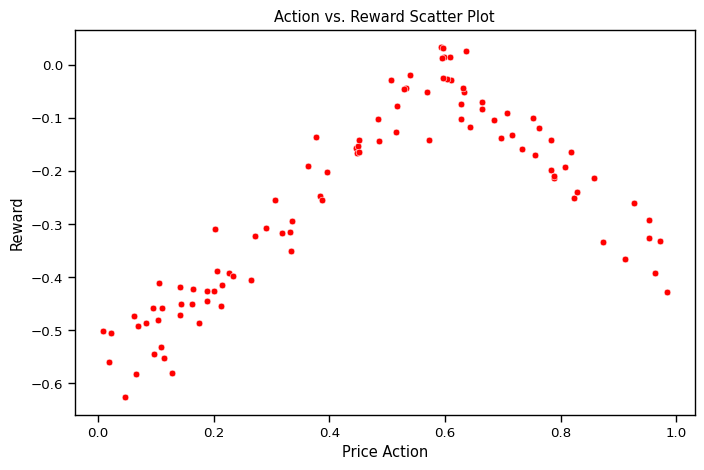

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Create dummy data ---
# Simulate price actions between 0 and 1
actions = np.random.uniform(low=0.0, high=1.0, size=100)
# Simulate rewards (can be correlated or random)
rewards = -np.abs(actions - 0.6) + np.random.normal(scale=0.05, size=100)  # just a toy reward logic

results_df = pd.DataFrame({
    "Action": actions,
    "Reward": rewards
})

# --- Step 2: Plot Action vs Reward ---
plt.figure(figsize=(8, 5))
sns.scatterplot(x=results_df["Action"], y=results_df["Reward"], color="red")
plt.xlabel("Price Action")
plt.ylabel("Reward")
plt.title("Action vs. Reward Scatter Plot")
plt.show()


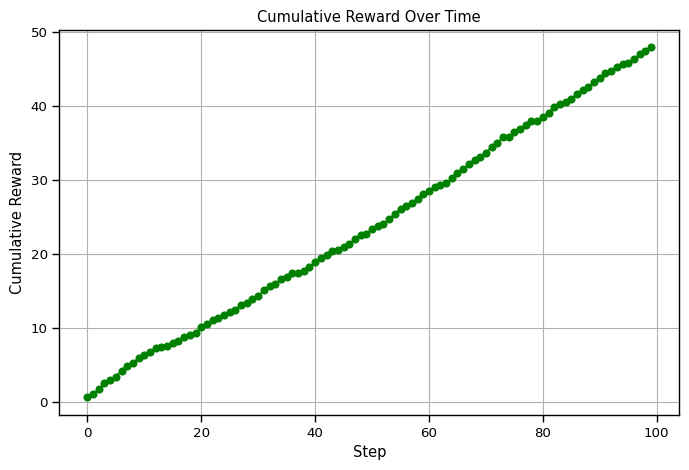

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Create dummy reward data ---
np.random.seed(42)  # For consistent results
rewards = np.random.normal(loc=0.5, scale=0.2, size=100)  # Simulated rewards

results_df = pd.DataFrame({
    "Reward": rewards
})

# --- Step 2: Compute cumulative reward ---
results_df["Cumulative_Reward"] = results_df["Reward"].cumsum()

# --- Step 3: Plot cumulative reward ---
plt.figure(figsize=(8, 5))
plt.plot(results_df["Cumulative_Reward"], marker="o", linestyle="-", color="green")
plt.xlabel("Step")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Over Time")
plt.grid(True)
plt.show()


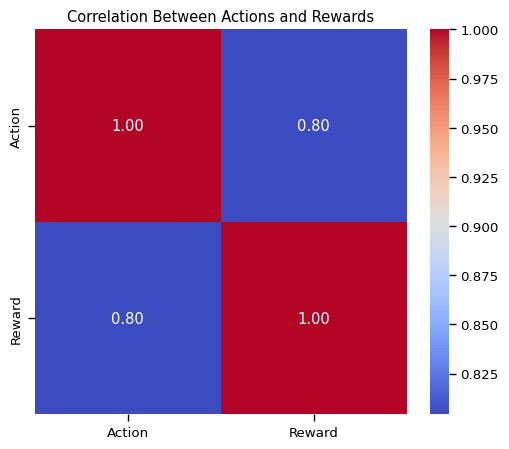

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Create dummy data ---
np.random.seed(0)
actions = np.random.uniform(0, 1, 100)
rewards = -np.abs(actions - 0.7) + np.random.normal(scale=0.05, size=100)  # Toy reward logic

results_df = pd.DataFrame({
    "Action": actions,
    "Reward": rewards
})

# --- Step 2: Compute correlation and plot heatmap ---
corr_matrix = results_df[["Action", "Reward"]].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Actions and Rewards")
plt.show()


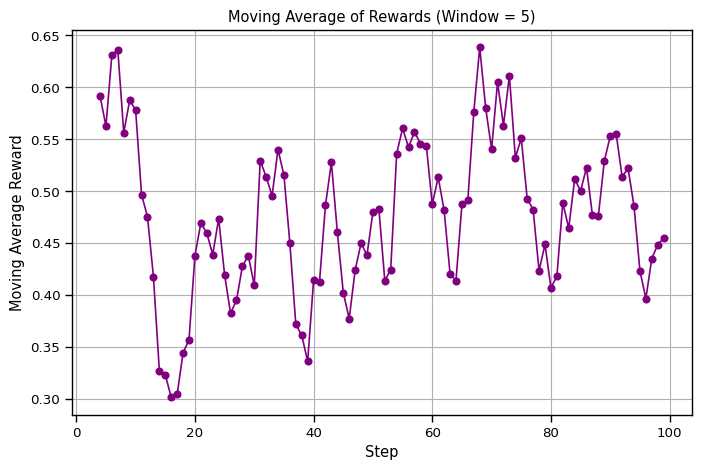

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Create dummy reward data ---
np.random.seed(42)
rewards = np.random.normal(loc=0.5, scale=0.2, size=100)

results_df = pd.DataFrame({
    "Reward": rewards
})

# --- Step 2: Calculate Moving Average (window = 5) ---
results_df["Moving_Avg_Reward"] = results_df["Reward"].rolling(window=5).mean()

# --- Step 3: Plot Moving Average Reward ---
plt.figure(figsize=(8, 5))
plt.plot(results_df["Moving_Avg_Reward"], marker="o", linestyle="-", color="purple")
plt.xlabel("Step")
plt.ylabel("Moving Average Reward")
plt.title("Moving Average of Rewards (Window = 5)")
plt.grid(True)
plt.show()
